In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import math
pd.set_option('display.max_columns', None)
data = pd.read_csv("../data/melb_data.csv")
data.head()


Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [193]:
# loop through each column in the dataset
for column in data.columns:
    # calculate the number of unique values in the column
    unique_values = data[column].nunique()
    # print the column name and number of unique values
    print(f"{column}: {unique_values}")


Suburb: 314
Address: 13378
Rooms: 9
Type: 3
Price: 2204
Method: 5
SellerG: 268
Date: 58
Distance: 202
Postcode: 198
Bedroom2: 12
Bathroom: 9
Car: 11
Landsize: 1448
BuildingArea: 602
YearBuilt: 144
CouncilArea: 33
Lattitude: 6503
Longtitude: 7063
Regionname: 8
Propertycount: 311


### Data preprocessing

### Irrelvant Data set Columns

In [194]:
### Dropping Irrelvant data
data = data.drop(['Address', 'Lattitude', 'Longtitude','Date'], axis=1)


### Numeric

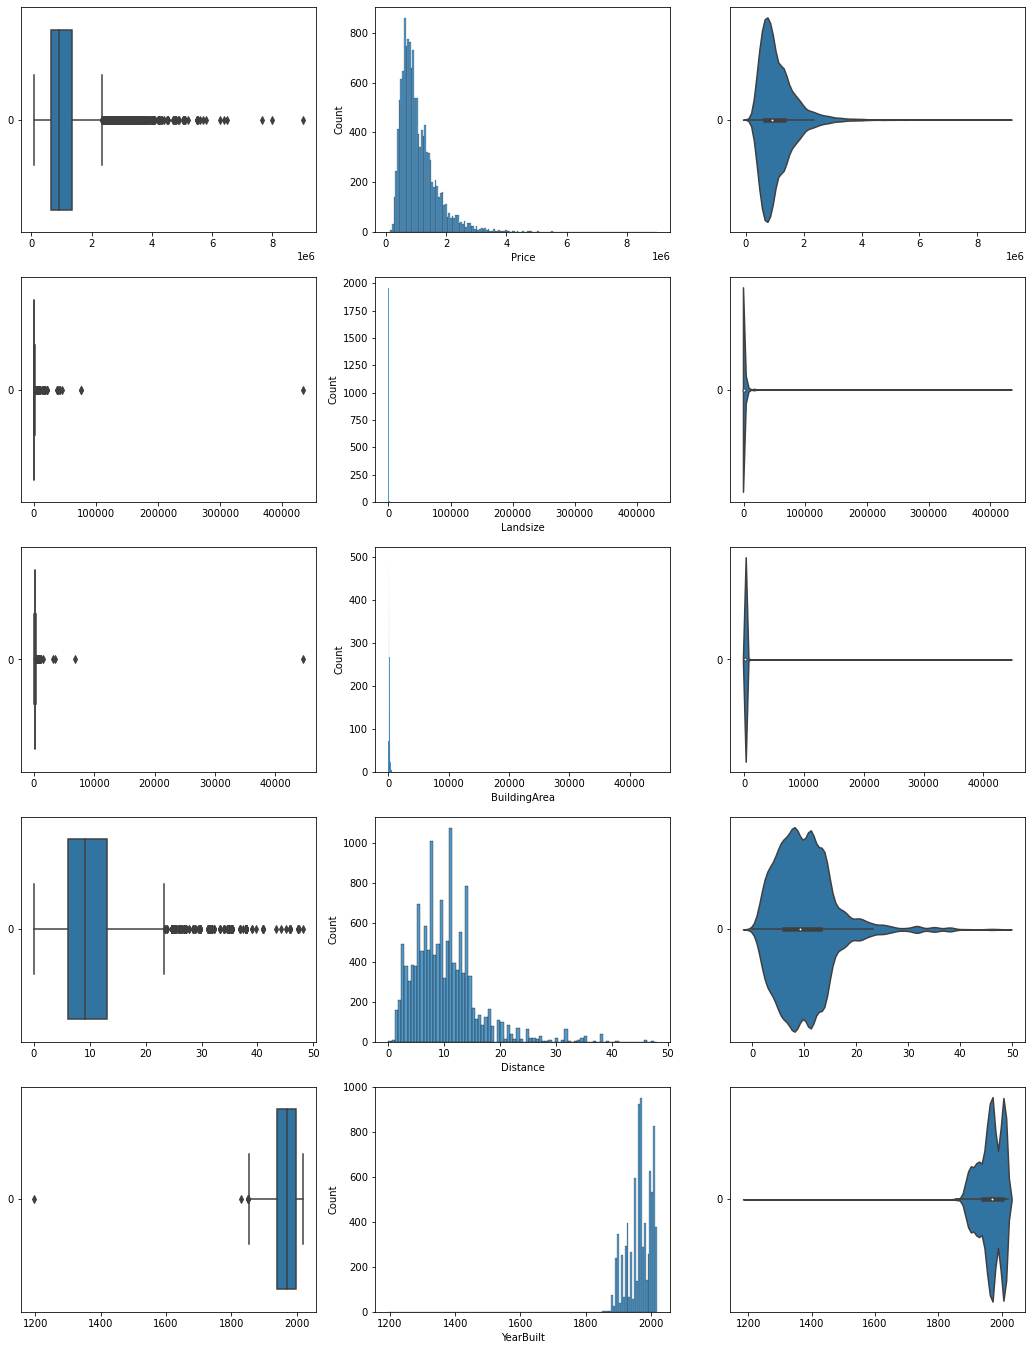

In [195]:
numeric_data = pd.DataFrame(
    data[["Price", "Landsize", "BuildingArea", "Distance", "YearBuilt"]])

# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data=numeric_data[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=numeric_data[var], ax=axes[count, 1])
    sb.violinplot(data=numeric_data[var], orient="h", ax=axes[count, 2])
    count += 1


From the looks of histogram graph and violin plot, we need to so z-score normalisation for Landsize, building area and yearbuilt, whereas for Price and Distance we nee do to Power Transform. We leave YearBuilt as it is as the outlier maybe important as part of the dataset.

In [196]:
#Landsize
mean = data["Landsize"].mean()
SD = data["Landsize"].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
data.drop(data[(data["Landsize"] < outlierHead) | (data["Landsize"] > outlierTail)].index, inplace=True)


In [197]:
#BuildingArea
mean = data["BuildingArea"].mean()
SD = data["BuildingArea"].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
data.drop(data[(data["BuildingArea"] < outlierHead) | (data["BuildingArea"] > outlierTail)].index, inplace=True)


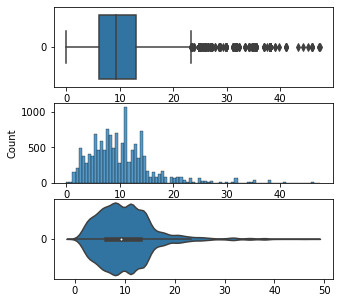

In [198]:
#Distance
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit_transform(data['Distance'].values.reshape(-1, 1))

f, axes = plt.subplots(3, 1, figsize=(5, 5))
sb.boxplot(data=data['Distance'], orient="h", ax=axes[0])
sb.histplot(data=data['Distance'], ax=axes[1])
sb.violinplot(data=data['Distance'], orient="h", ax=axes[2])


c:\Users\Rebirth\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


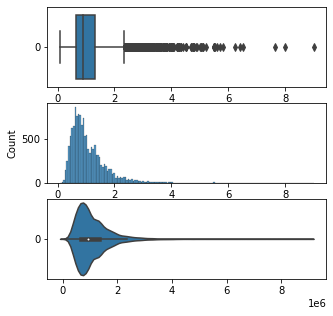

In [199]:
#Price
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit_transform(data['Price'].values.reshape(-1, 1))

f, axes = plt.subplots(3, 1, figsize=(5, 5))
sb.boxplot(data=data['Price'], orient="h",ax=axes[0])
sb.histplot(data=data['Price'], ax=axes[1])
sb.violinplot(data=data['Price'], orient="h", ax=axes[2])



### Categorical

In [200]:
categorical_variable = pd.DataFrame(data[["Suburb", "Rooms", "Method", "Type", "SellerG", "Bedroom2","Bathroom", "Car", "CouncilArea", "Regionname", "Propertycount", "Postcode"]])


In [201]:
def countplot_helper(variable, data, width, height):
    # create a larger figure
    plt.figure(figsize=(width, height))

    # Create the scatter plot
    sb.catplot(y=variable, data=data, kind="count")

    # Add labels and a title
    plt.title('Boxplot of {} '.format(variable))

    # show the plot
    plt.show()


#### Suburbs

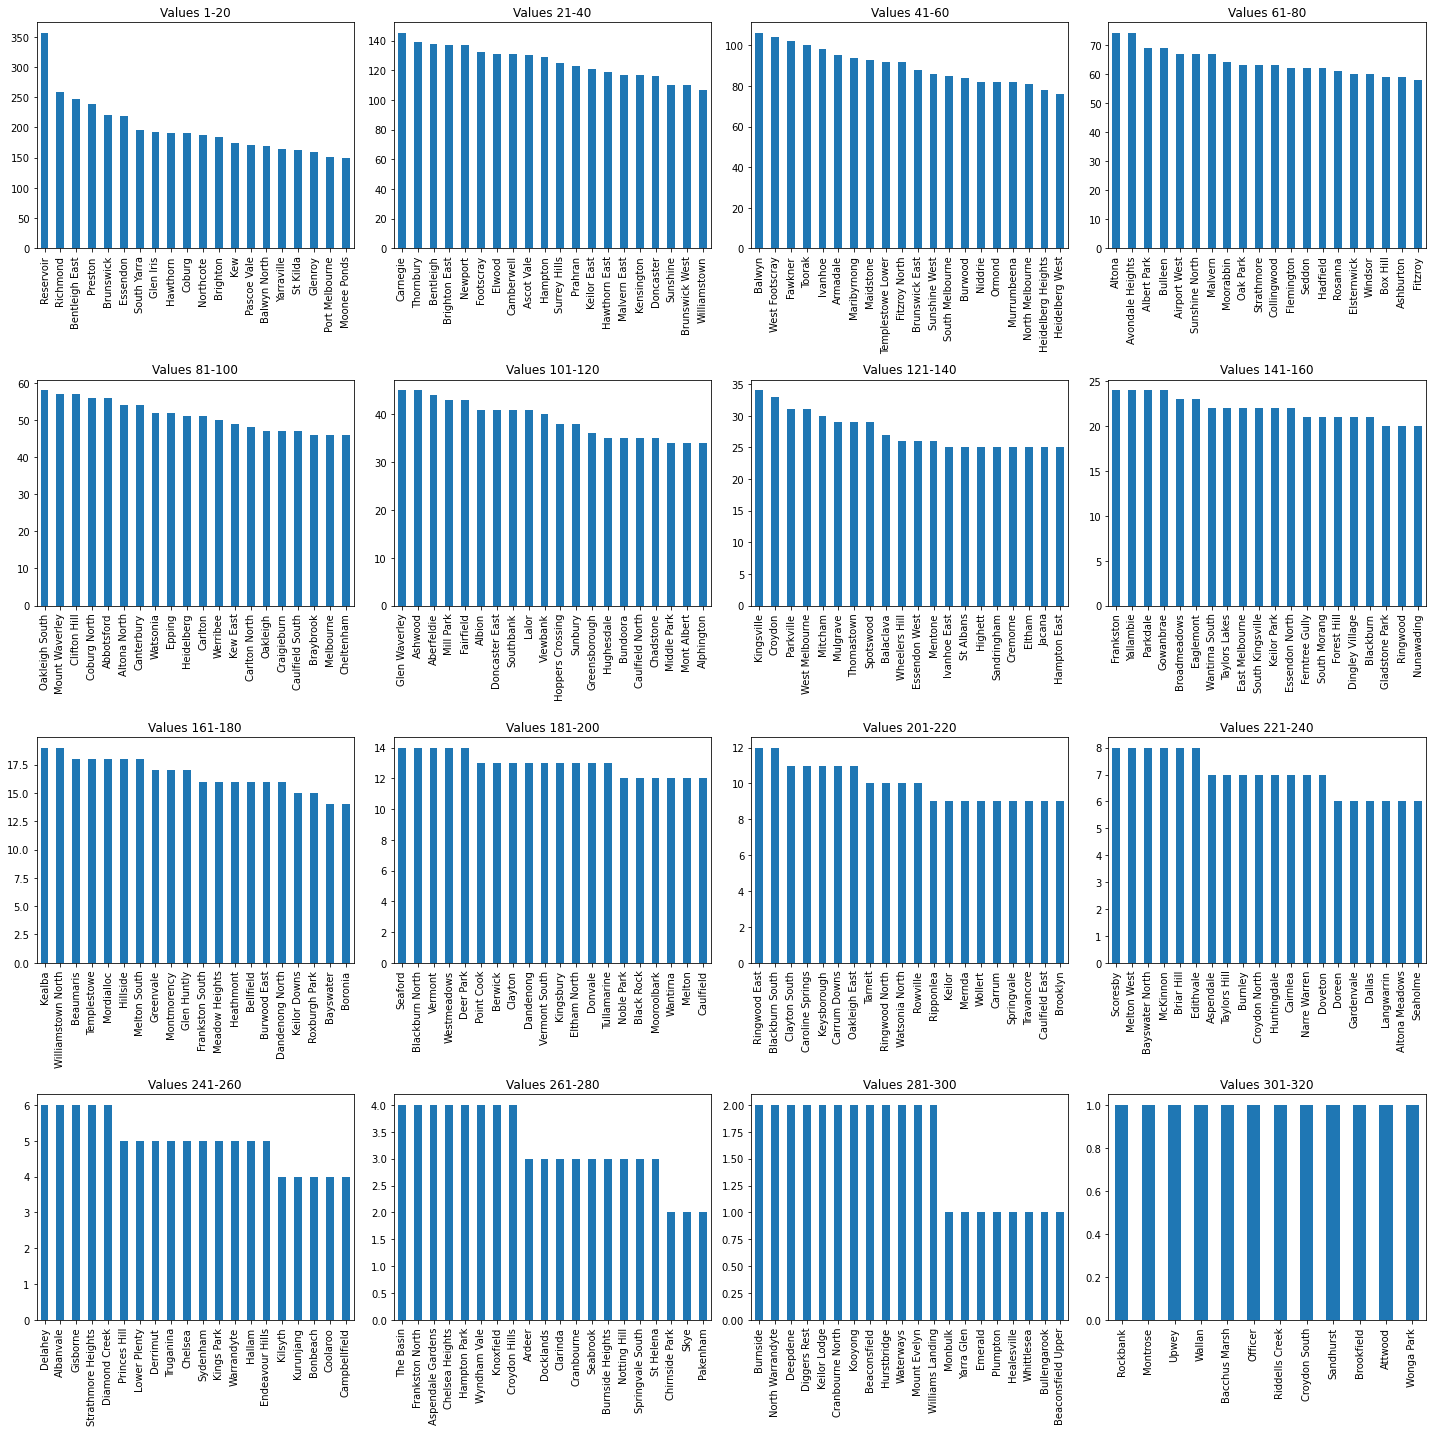

In [202]:
# assume data is a pandas Series object containing the 314 unique values
value_counts = data['Suburb'].value_counts()

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i in range(16):
    start = i*20
    end = start+20
    top_values = value_counts.iloc[start:end]
    top_values.plot(kind='bar', ax=axs[math.floor(i/4), i % 4], title=f"Values {start+1}-{end}")

plt.tight_layout()
plt.show()


There is a very wide range of value for each class in Suburbs. This will make it difficult to analyse later on. Later, we will be using target encoding for exploratory analysis to address this issue.

#### Rooms

<Figure size 720x720 with 0 Axes>

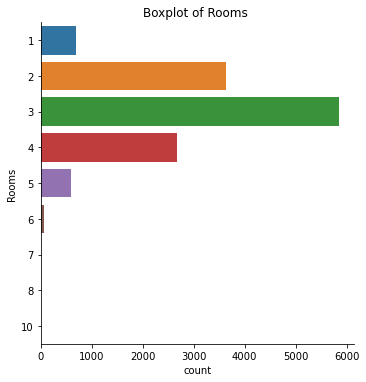

In [203]:
countplot_helper("Rooms", categorical_variable, 10, 10)


Numbers of cases with more than 6 rooms are too insignificant (with only less than 20 out of 13580 values) for the model to make prediction in that range. We may need to drop those cases to prevent them from biasing the prediction.

In [204]:
outliers = data[data["Rooms"] > 6]
print(len(outliers))
data = data.drop(data[data['Rooms'] > 6].index)


18


#### Type

<Figure size 720x720 with 0 Axes>

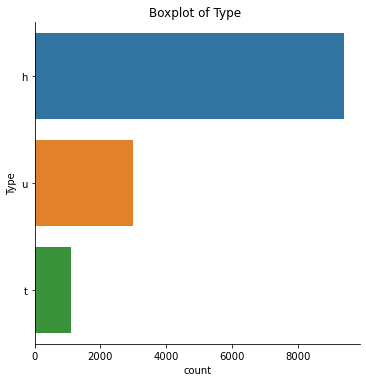

In [205]:
countplot_helper("Type", categorical_variable, 10, 10)


Nothing significant here to note

#### Type

<Figure size 720x720 with 0 Axes>

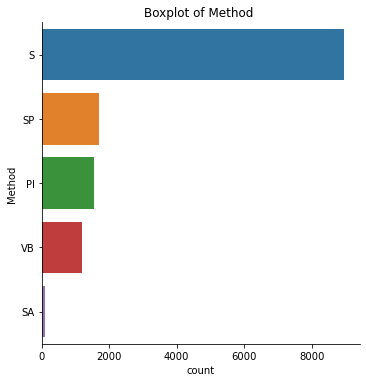

In [206]:
countplot_helper("Method", categorical_variable, 10, 10)


Nothing significant here to note, aside that SA might be abit too small to categorise

#### SellerG

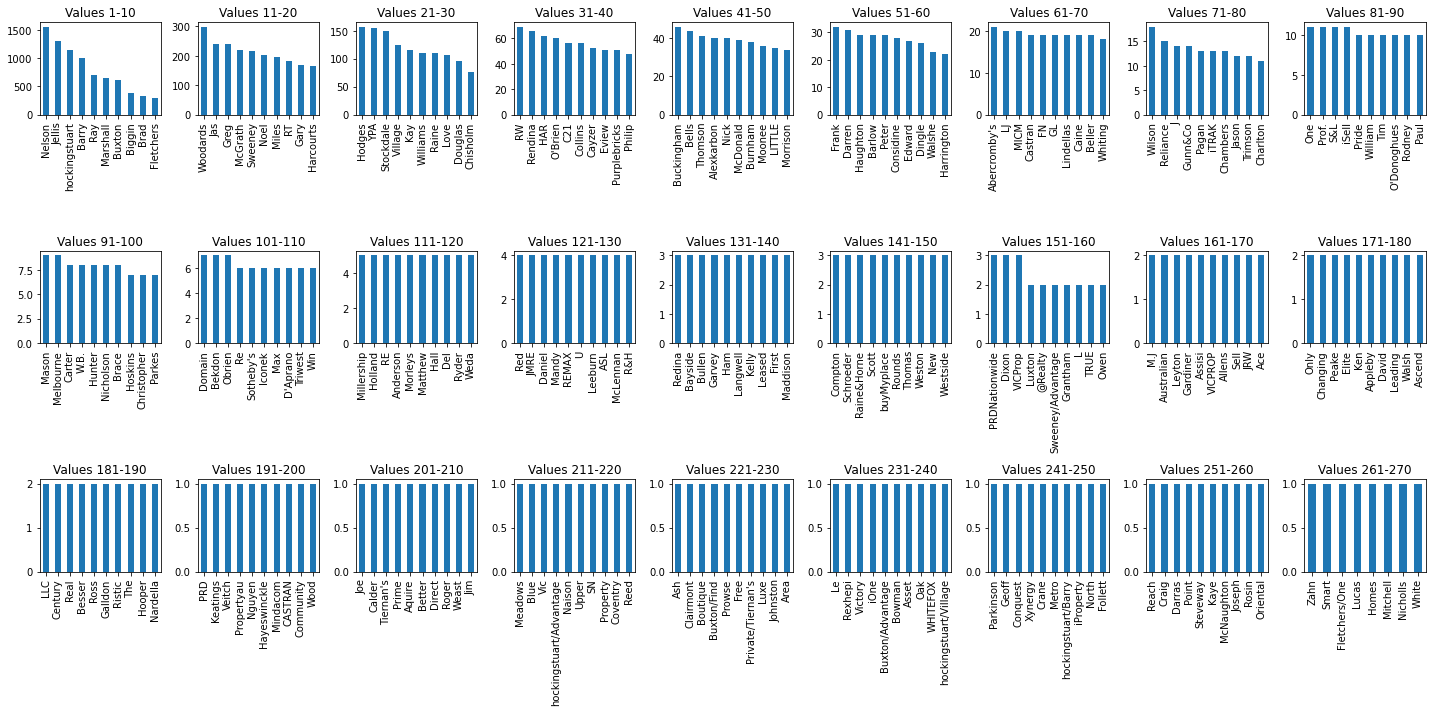

In [207]:
# assume data is a pandas Series object containing the 314 unique values
value_counts = data['SellerG'].value_counts()

fig, axs = plt.subplots(nrows=3, ncols=9, figsize=(20, 10))

for i in range(27):
    start = i*10
    end = start+10
    top_values = value_counts.iloc[start:end]
    top_values.plot(kind='bar', ax=axs[math.floor(
        i/9), i % 9], title=f"Values {start+1}-{end}")

plt.tight_layout()
plt.show()


Same thing with suburbs, we will use target encoding the potential issue that will arise during data analysis

#### Bedroom2

<Figure size 720x720 with 0 Axes>

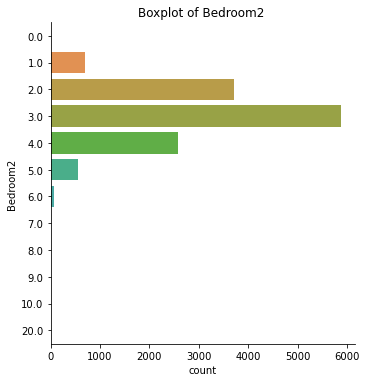

In [208]:
countplot_helper("Bedroom2", categorical_variable, 10, 10)


The number of cases with more than 6 bedrooms is insignificant as compared to the total number of cases, providing limited information for model learning. We may need to drop those cases to prevent them from biasing the prediction.

In [209]:
outliers = data[data["Bedroom2"] > 6]
print(len(outliers))
data = data.drop(data[data['Bedroom2'] > 6].index)


6


#### Bathroom

<Figure size 720x720 with 0 Axes>

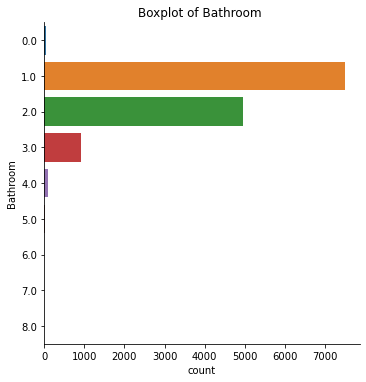

In [210]:
countplot_helper("Bathroom", categorical_variable, 10, 10)


The number of cases with more than 4 bathrooms is insignificant as compared to the total number of cases, providing limited information for model learning. We may need to drop those cases to prevent them from biasing the prediction.

In [211]:
outliers = data[data["Bathroom"] > 4]
print(len(outliers))
data = data.drop(data[data['Bedroom2'] > 4].index)


32


#### Car

<Figure size 720x720 with 0 Axes>

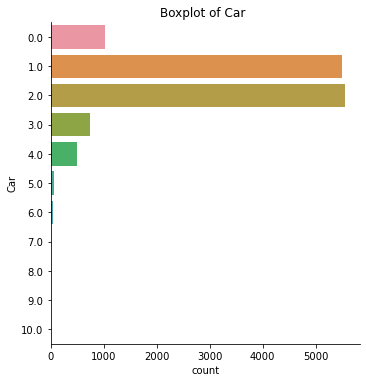

In [212]:
countplot_helper("Car", categorical_variable, 10, 10)


The number of cases with more than 5 carspots is insignificant as compared to the total number of cases, providing limited information for model learning. We may need to drop those cases to prevent them from biasing the prediction.

In [213]:
outliers = data[data["Car"] > 6]
print(len(outliers))
data = data.drop(data[data["Car"] > 6].index)

18


#### CouncilArea

<Figure size 720x720 with 0 Axes>

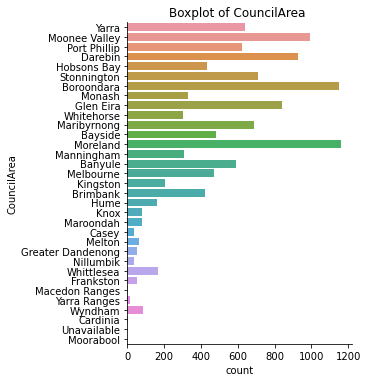

In [214]:
countplot_helper("CouncilArea", categorical_variable, 10, 10)


Nothing significant here to note aside from the fact that some classes for councilArea maybe too small too categorise

#### Regionname

<Figure size 720x72 with 0 Axes>

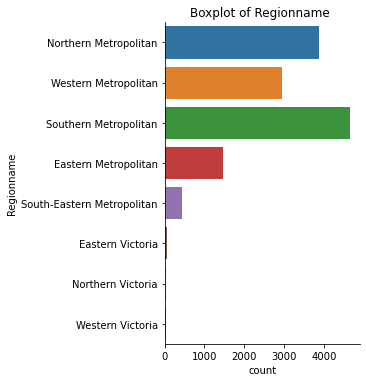

In [215]:

countplot_helper("Regionname", categorical_variable, 10, 1)


Nothing significant here to note aside from the fact that some Region maybe too small too categorise

### Yearbuilt

## Exploratory Data Analysis

blah blah blah

### Numeric

In [216]:
numeric = pd.DataFrame(data[["Price", "Landsize", "BuildingArea", "Distance", "YearBuilt"]])


In [217]:
# Box-plot helper function, x is categorical, y is numeric variable
def scatterplot_helper(x, y, data, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.scatterplot(x=x, y=y, data=data)

    # Add labels and a title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Boxplot of {} by {}'.format(y, x))

    # show the plot
    plt.show()


### Yearbuilt against Price

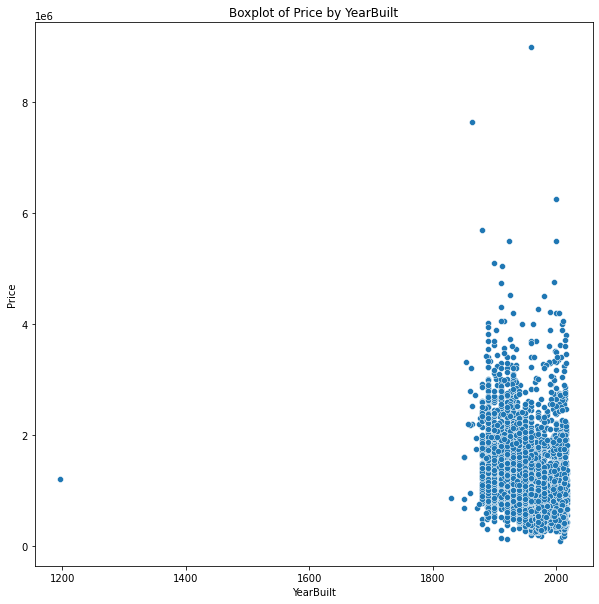

           YearBuilt     Price
YearBuilt   1.000000 -0.346434
Price      -0.346434  1.000000


In [218]:
scatterplot_helper("YearBuilt", "Price", numeric, 10, 10)
yearbuilt = pd.DataFrame(numeric[["YearBuilt", "Price"]])
# calculate the correlation matrix
corr_matrix = yearbuilt.corr()
# print the correlation matrix
print(corr_matrix)


It is abit difficult to tell if there is a relationship between price and yearbuilt using scatterplot

We also can see that yearbuilt is a discrete variable from the scatterplot

We will use target encoding to see if there is a better relationship between yearbuilt and price by trearting the year as categorical variable and find the average price for each class.

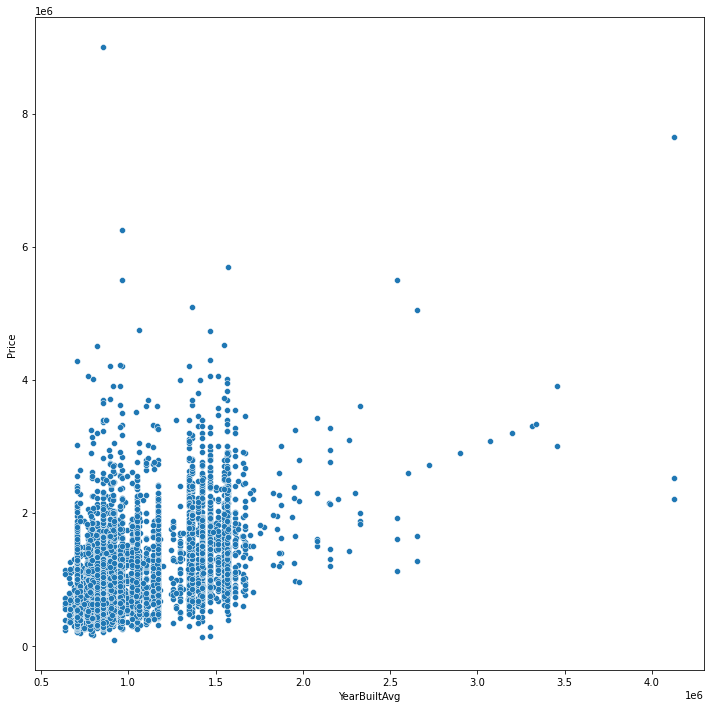

              YearBuilt     Price  YearBuiltAvg
YearBuilt      1.000000 -0.346434     -0.703565
Price         -0.346434  1.000000      0.492398
YearBuiltAvg  -0.703565  0.492398      1.000000


In [219]:
#Target encoding
# Test is use as a temp variable
test = pd.DataFrame(data[['YearBuilt', 'Price']])
test['YearBuiltAvg'] = test.groupby('YearBuilt')['Price'].transform('mean')
# create a larger figure
plt.figure(figsize=(12, 12))

# Create the scatter plot
sb.scatterplot(x='YearBuiltAvg', y='Price', data=test)

# show the plot
plt.show()

corr_matrix = test.corr()
print(corr_matrix)


We see a much better improvement in terms of the visualisation of the relationship for Yearbuilt and price. We might want to consider this for our feature selection

### Distance vs Price

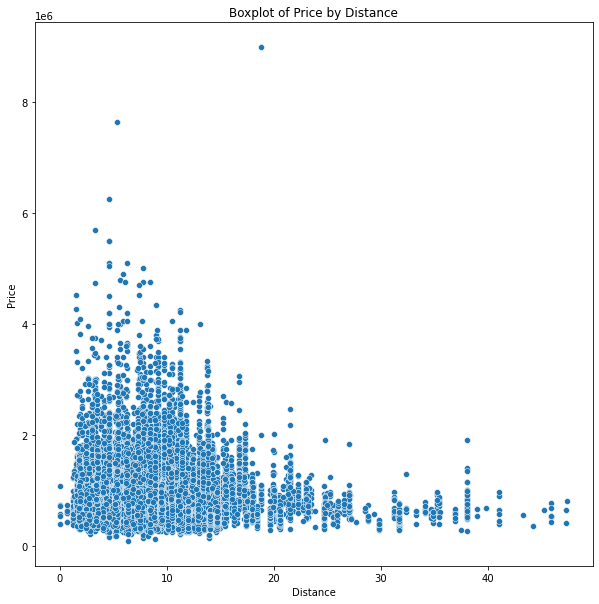

          Distance     Price
Distance  1.000000 -0.169612
Price    -0.169612  1.000000


In [220]:
scatterplot_helper("Distance", "Price", numeric, 10, 10)
distance = pd.DataFrame(numeric[["Distance", "Price"]])
# calculate the correlation matrix
corr_matrix = distance.corr()
# print the correlation matrix
print(corr_matrix)


From the scatterplot, there seem to be a inverse relationship between distance and price (1/x). We can use loganrithm linearisation to see if there is any relationship

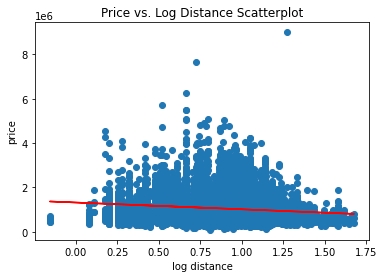

In [221]:
# drop rows where distance is 0
distance = distance[distance['Distance'] != 0]

# create a new variable that is the logarithm of the distance
distance['log_distance'] = np.log10(distance['Distance'])

# create the scatterplot with logarithmic x-axis
plt.scatter(distance['log_distance'], distance['Price'])

# add a regression line
fit = np.polyfit(distance['log_distance'], distance['Price'], 1)
plt.plot(distance['log_distance'], fit[0] * distance['log_distance'] + fit[1], color='red')

# set the labels and title
plt.xlabel('log distance')
plt.ylabel('price')
plt.title('Price vs. Log Distance Scatterplot')

# show the plot
plt.show()


From this analysis we can conclude that distance isnt a very good indicator of price

### Landsize vs Price

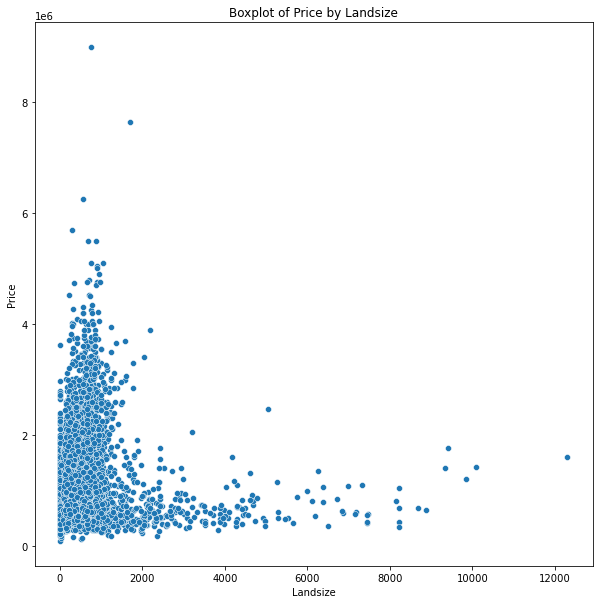

          Landsize     Price
Landsize  1.000000  0.103419
Price     0.103419  1.000000


In [222]:
scatterplot_helper("Landsize", "Price", numeric, 10, 10)
Landsize = pd.DataFrame(numeric[["Landsize", "Price"]])
# calculate the correlation matrix
corr_matrix = Landsize.corr()
# print the correlation matrix
print(corr_matrix)


From the scatterplot, there seem to be a inverse relationship between distance and price (1/x). We can use loganrithm linearisation to see if there is any relationship

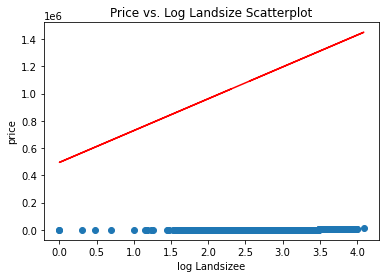

In [223]:
# drop rows where distance is 0
Landsize = Landsize[Landsize['Landsize'] != 0]

# create a new variable that is the logarithm of the distance
Landsize['log_Landsize'] = np.log10(Landsize['Landsize'])

# create the scatterplot with logarithmic x-axis
plt.scatter(Landsize['log_Landsize'], Landsize['Landsize'])

# add a regression line
fit = np.polyfit(Landsize['log_Landsize'], Landsize['Price'], 1)
plt.plot(Landsize['log_Landsize'], fit[0] *
         Landsize['log_Landsize'] + fit[1], color='red')

# set the labels and title
plt.xlabel('log Landsizee')
plt.ylabel('price')
plt.title('Price vs. Log Landsize Scatterplot')

# show the plot
plt.show()


From this analysis we can conclude that LandSize isnt a very good indicator of price

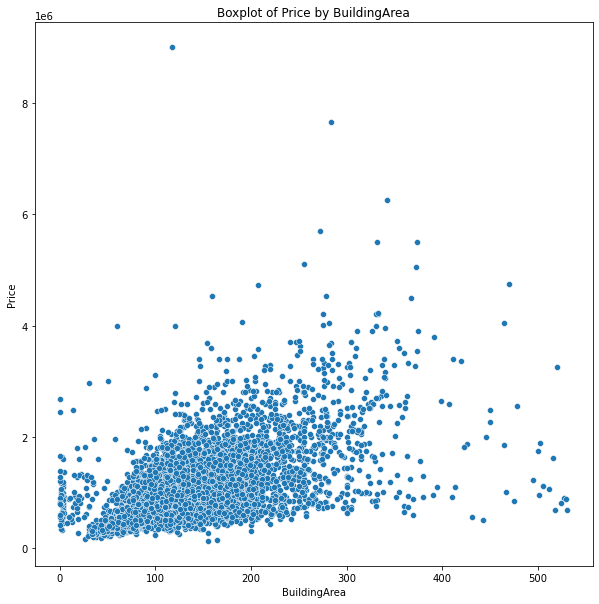

              BuildingArea     Price
BuildingArea      1.000000  0.576608
Price             0.576608  1.000000


In [224]:
scatterplot_helper("BuildingArea", "Price", numeric, 10, 10)
BldArea = pd.DataFrame(numeric[["BuildingArea", "Price"]])
# calculate the correlation matrix
corr_matrix = BldArea.corr()
# print the correlation matrix
print(corr_matrix)


There seems to be a positive correlation between price and building area.

Hence, building area is a factor we should consider for our model.

Building area seems to be the strongest factors affecting housing price.

## Categorical

In [225]:
# Box-plot helper function, x is categorical, y is numeric variable
def boxplot_helper(x, y, data, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))
    # create a boxplot of a categorical variable against a numeric variable
    sb.boxplot(x=x, y=y, data=data, palette='rainbow')
    # add a title to the plot
    plt.title('Boxplot of {} by {}'.format(y, x))
    # show the plot
    plt.show()


categorical = pd.DataFrame(data[["Suburb", "Rooms", "Method", "Type", "SellerG", "Bedroom2",
                                 "Bathroom", "Car", "CouncilArea", "Regionname", "Propertycount", "Postcode", "Price"]])


### Suburb vs price

ValueError: could not convert string to float: 'Seller0'

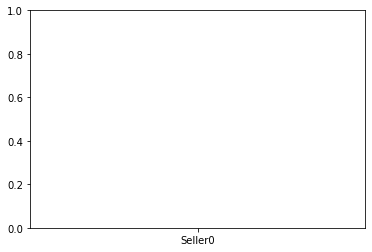

In [257]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate some sample data
data = pd.DataFrame({'SellerG': ['Seller' + str(i) for i in range(314)]*10,
                     'Price': pd.Series(np.random.randn(3140))})

# Create a hexbin plot
plt.hexbin(x=data['SellerG'], y=data['Price'], gridsize=20, cmap='Blues')
plt.xlabel('SellerG')
plt.ylabel('Price')
plt.show()


In [226]:
boxplot_helper("Suburb", "Price", categorical, 500, 200)
Suburb = pd.DataFrame(categorical[["Suburb", "Price"]])

The boxplot does not seem to give us a very good visualisation of the category, we will be using target encoding to better analyse the relationship between suburbs and price using the avergae price of each suburbs

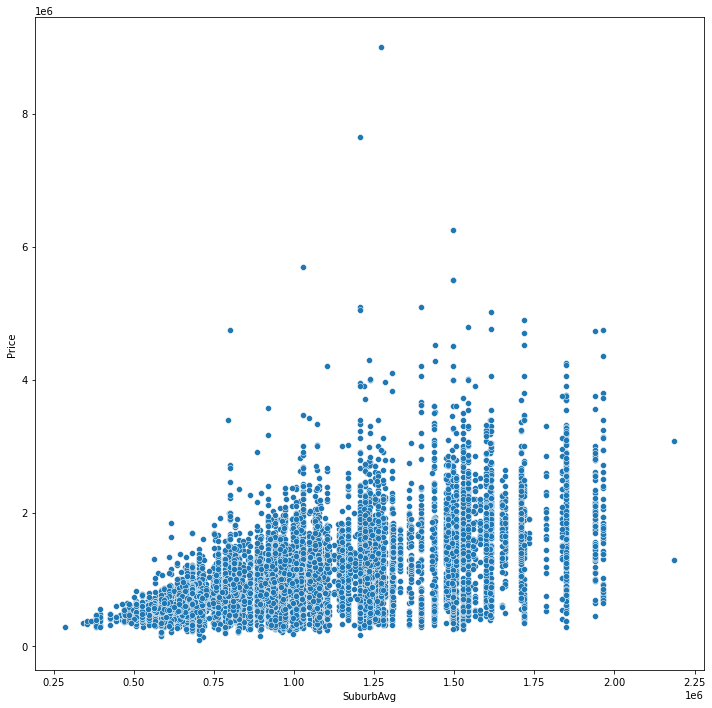

              Price  SuburbAvg
Price      1.000000   0.547286
SuburbAvg  0.547286   1.000000


In [259]:
#Target encoding
# Test is use as a temp variable
test = pd.DataFrame(Suburb[['Suburb', 'Price']])
test['SuburbAvg'] = test.groupby('Suburb')['Price'].transform('mean')
# Sort the DataFrame by the average price in descending order
suburb_avg = test.sort_values(by='SuburbAvg', ascending=False)
# create a larger figure
plt.figure(figsize=(12, 12))
# Create a bar plot with sorted order
# Create the scatter plot
sb.scatterplot(x='SuburbAvg', y='Price', data=test)
# Show the plot
plt.show()

corr_matrix = test.corr()
print(corr_matrix)


In [260]:
test

Suburb      Price     SuburbAvg
0         Abbotsford  1480000.0  1.060366e+06
1         Abbotsford  1035000.0  1.060366e+06
2         Abbotsford  1465000.0  1.060366e+06
3         Abbotsford   850000.0  1.060366e+06
4         Abbotsford  1600000.0  1.060366e+06
...              ...        ...           ...
13575  Wheelers Hill  1245000.0  1.226872e+06
13576   Williamstown  1031000.0  1.278403e+06
13577   Williamstown  1170000.0  1.278403e+06
13578   Williamstown  2500000.0  1.278403e+06
13579     Yarraville  1285000.0  9.725524e+05

[12861 rows x 3 columns]

This shows that some suburbs do sell for a higher price, we should consider it for our model

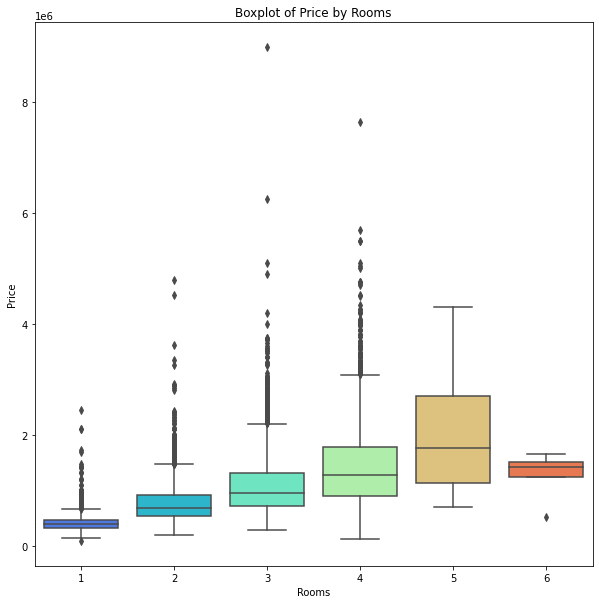

In [228]:
boxplot_helper("Rooms", "Price", categorical, 10, 10)

There seems to be a slight positive correlation between price and room number as the median price increase slightly as the number of rooms increases

### Type VS Price

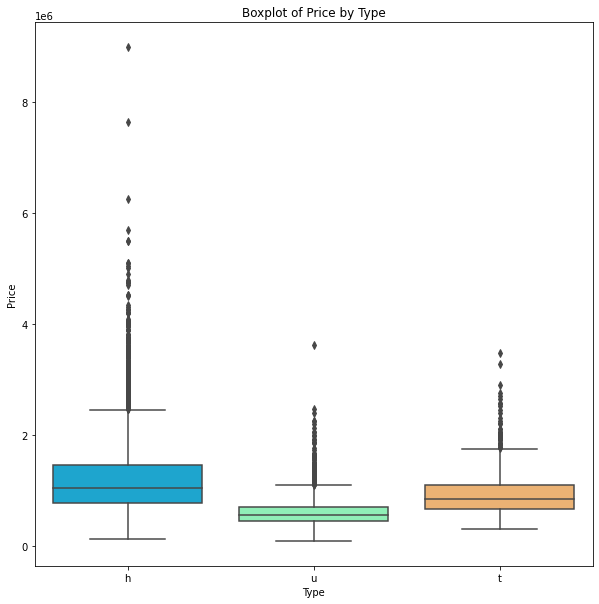

In [229]:
boxplot_helper("Type", "Price", categorical, 10, 10)


There is not a significant relationship between the type and price as the median price for each type is close to each other. Thus we can discard type for feature selection.

### Method Vs Price

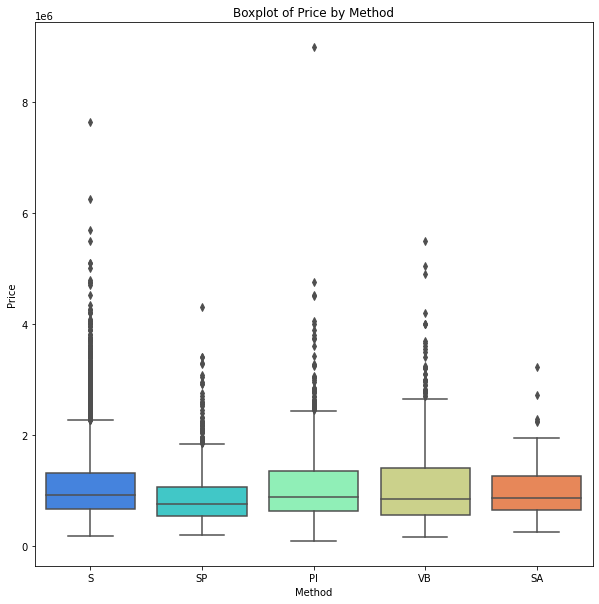

In [230]:
boxplot_helper("Method", "Price", categorical, 10, 10)


Similarlly, there is not a significant relationship between the method and price as the median price for each type is close to each other. Thus we can discard method for feature selection.

### SellerG Vs Price

In [231]:
boxplot_helper("SellerG", "Price", categorical, 500, 200)
SellerG = pd.DataFrame(categorical[["SellerG", "Price"]])


Similarlly to Suburbs, The boxplot does not seem to give us a very good visualisation of the category, we will be using target encoding to better analyse the relationship between suburbs and price using the avergae price of each SellerG

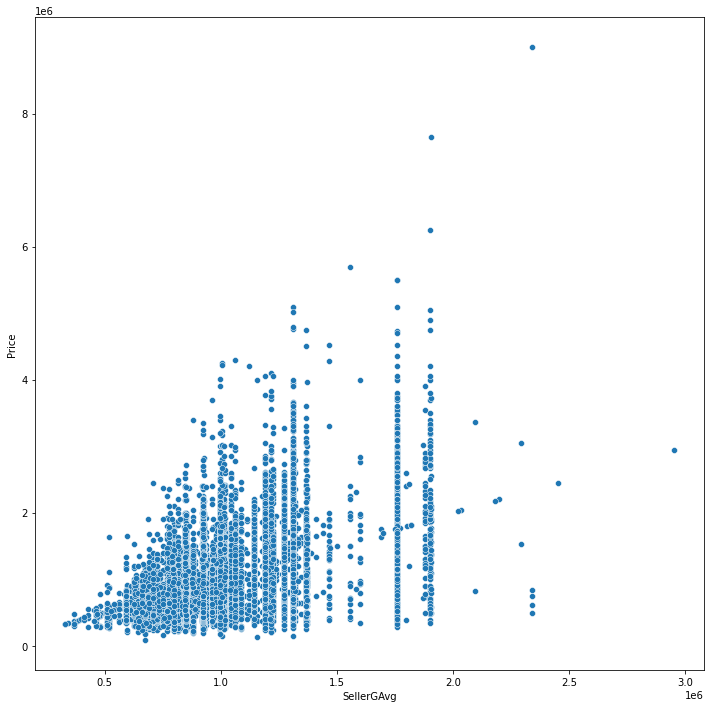

              Price  SellerGAvg
Price       1.00000     0.46739
SellerGAvg  0.46739     1.00000


In [232]:
#Target encoding
# Test is use as a temp variable
test = pd.DataFrame(SellerG[['SellerG', 'Price']])
test['SellerGAvg'] = test.groupby('SellerG')['Price'].transform('mean')
# create a larger figure
plt.figure(figsize=(12, 12))

# Create the scatter plot
sb.scatterplot(x='SellerGAvg', y='Price', data=test)

# show the plot
plt.show()

corr_matrix = test.corr()
print(corr_matrix)


This shows that SellerG have a decent relationship between price, we should consider it in our model

In [233]:
boxplot_helper("Postcode", "Price", categorical, 500, 200)
Postcode = pd.DataFrame(categorical[["Postcode", "Price"]])


Similarlly to Suburbs, The boxplot does not seem to give us a very good visualisation of the category, we will be using target encoding to better analyse the relationship between suburbs and price using the avergae price of each postcode

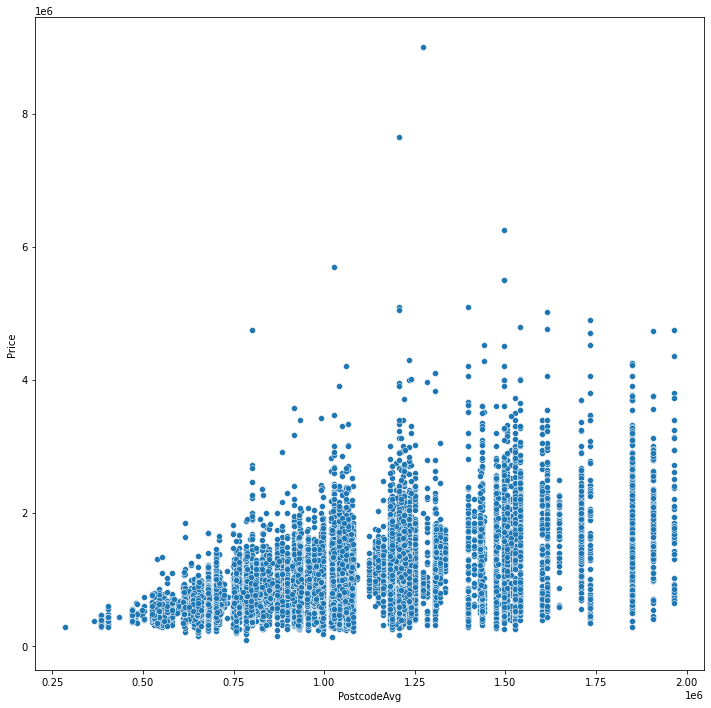

             Postcode     Price  PostcodeAvg
Postcode     1.000000  0.110719     0.207566
Price        0.110719  1.000000     0.533416
PostcodeAvg  0.207566  0.533416     1.000000


In [234]:
#Target encoding
# Test is use as a temp variable
test = pd.DataFrame(Postcode[['Postcode', 'Price']])
test['PostcodeAvg'] = test.groupby('Postcode')['Price'].transform('mean')
# create a larger figure
plt.figure(figsize=(12, 12))

# Create the scatter plot
sb.scatterplot(x='PostcodeAvg', y='Price', data=test)

# show the plot
plt.show()

corr_matrix = test.corr()
print(corr_matrix)


For some reason, Postcode have a decent relationship between price, we should consider it in our model. As usually postcode is drop as a redudant data.

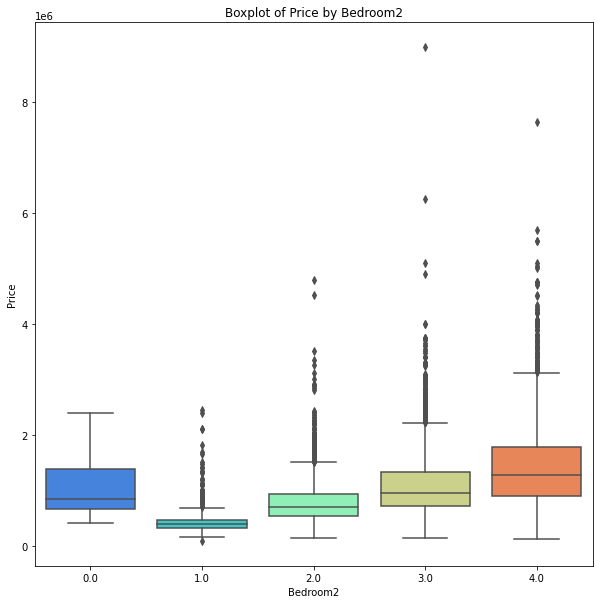

In [235]:
boxplot_helper("Bedroom2", "Price", categorical, 10, 10)


There seems to be a positive correlation between price and number of bedrooms with the exception for categories with 0. We should consider it for model selection.

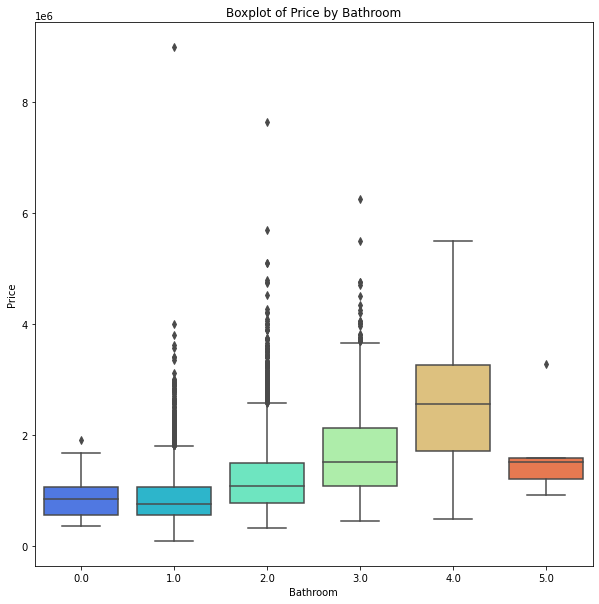

In [236]:
boxplot_helper("Bathroom", "Price", categorical, 10, 10)


There seems to be a general increase in price when the number of bedrooms increase, with the exception for categories with 5 bedrooms, possibly due to the limited number of cases.

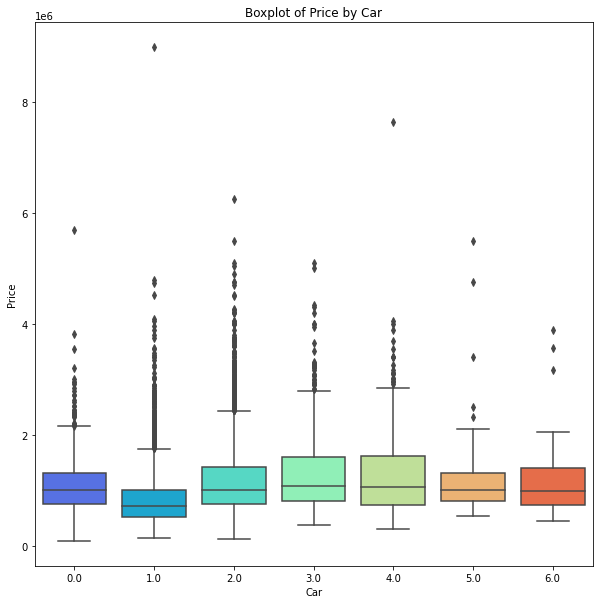

In [237]:
boxplot_helper("Car", "Price", categorical, 10, 10)


There does not seem to have a strong correlation between cars and price as the price remain roughly about the same regardless of car' value, thus we may not need to consider it for our model.

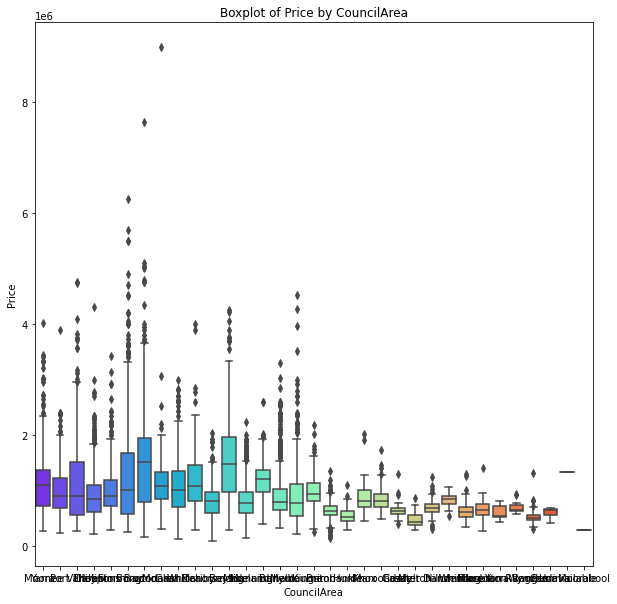

In [238]:
boxplot_helper("CouncilArea", "Price", categorical, 10, 10)
CouncilArea = pd.DataFrame(categorical[["CouncilArea", "Price"]])


Similarlly to Suburbs, The boxplot does not seem to give us a very good visualisation of the category, we will be using target encoding to better analyse the relationship between suburbs and price using the avergae price of each councilarea

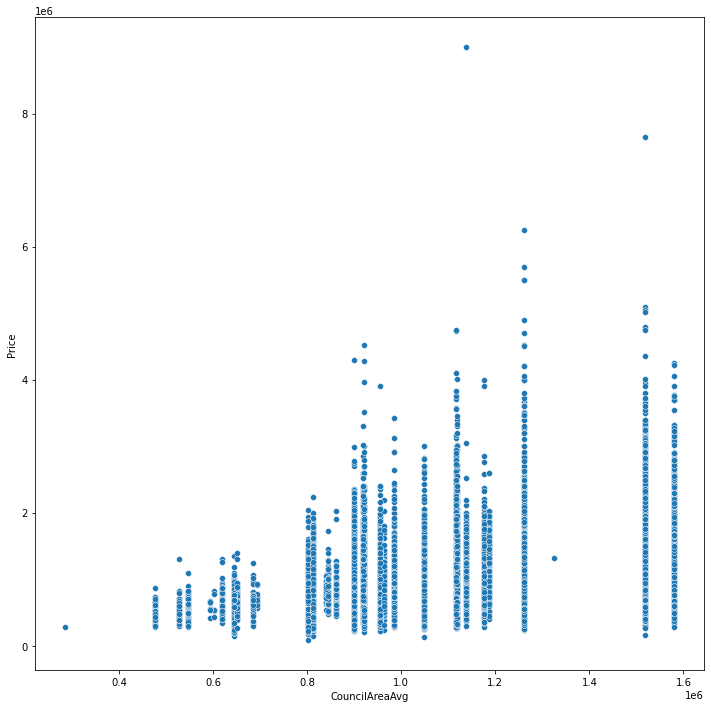

                   Price  CouncilAreaAvg
Price           1.000000        0.431651
CouncilAreaAvg  0.431651        1.000000


In [239]:
#Target encoding
# Test is use as a temp variable
test = pd.DataFrame(CouncilArea[['CouncilArea', 'Price']])
test['CouncilAreaAvg'] = test.groupby('CouncilArea')['Price'].transform('mean')
# create a larger figure
plt.figure(figsize=(12, 12))

# Create the scatter plot
sb.scatterplot(x='CouncilAreaAvg', y='Price', data=test)

# show the plot
plt.show()

corr_matrix = test.corr()
print(corr_matrix)


This scatter plot show that councilarea a minor correlation between price, thus we might consider for our model.

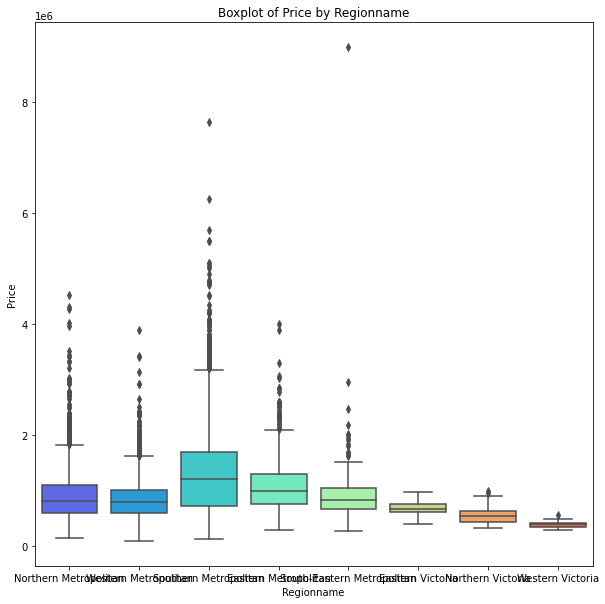

In [241]:
boxplot_helper("Regionname", "Price", categorical, 10, 10)


Region does not seem to show any relationship with price as there is not a distinguishable price point between each class as their median price is about the same as shown on this boxplot. thus we might not need to consider it.